# Handling Missing Values

#### Types Of Missing Values

- __Missing Completely at Random (MCAR) :__

Values in a data set are missing completely at random (MCAR) if the events that lead to any particular data-item being missing are independent both of observable variables and of unobservable parameters of interest, and occur entirely at random. When data are MCAR, the analysis performed on the data is unbiased; __however, data are rarely MCAR.__

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.chdir(r'C:\Users\Gourav Nandy\OneDrive\My career\Data Science\datasets\Titanic Dataset')

In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df = df.set_index('PassengerId')

In [6]:
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

As you can see the number of dead people are more. Hence, the age column and cabin column must have more nan values. So the age and cabin features are dependent on survived feature. Hence, they are __not MCAR__

In [11]:
df[df['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


As you can see the in __Embarked__ feature, the NaN values do not have any relationship between any of the feature, hence it __is MCAR__ 

- __Missing Not At Random (MNAR)__ (Systematic Missing) 

There is some relationship between the missing values and other values missing or present. 




Converting the NaN values in __Cabin__  & __Age__ to 1 and the rest 0.

In [12]:
df['Cabin_null'] = np.where(df['Cabin'].isnull(),1,0)
df['Age_null'] = np.where(df['Age'].isnull(),1,0)

In [13]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_null,Age_null
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0


In [14]:
# Finding the percentage of Null values in Cabin_null.
print((df['Cabin_null'].mean())*100,'%')
print((df['Age_null'].mean())*100,'%')

77.10437710437711 %
19.865319865319865 %


Lets see by comparing with __Survived__

In [15]:
df.groupby(['Survived'])['Cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

*The above calculation states that 87.6% of null values in Cabin is because the people didnt survive and 60% of the null values in Cabin is from the people who have survived.*

- __Missing At Random (MAR)__ :

Missing at random (MAR) occurs when the missingness is not random, but where missingness can be fully accounted for by variables where there is complete information.An example is that males are less likely to fill in a depression survey but this has nothing to do with their level of depression, after accounting for maleness. Depending on the analysis method, these data can still induce parameter bias in analyses due to the contingent emptiness of cells (male, very high depression may have zero entries).

For eg : Men not filling up their salaries and Women not telling their age. Here __Cabin__ are MAR.

In [16]:
df.groupby(['Survived'])['Age_null'].mean()

Survived
0    0.227687
1    0.152047
Name: Age_null, dtype: float64

In [17]:
df.groupby(['Sex'])['Age_null'].mean()

Sex
female    0.168790
male      0.214905
Name: Age_null, dtype: float64

### Methods to handle different Missing values : 

- __Mean/ Median/ Mode Replacement__
- __Random Sample Imputaion__
- __Capturing NaN values with a new feature__
- __End of Distribution Imputation__
- __Frequent Categories Imputation__
- __Creating a new category for Missing values in Categorical variable__
- __KNN Imputation__
- __Iterative Imputer (MICE Imputer)__



## Mean Median Mode Replacement

The NaN values are imputed with Mean, Median and Mode. 

When to apply Mean/ Median/ Mode ?
- Mean/Median can be applied when the data is MCAR. 
Mean impuation can be applied when the variable is normally distributed. Median imputation can be applied where the data is skewed. 

- Mode can be applied for the categorical variable with the same conditions. 

As we know here in the data set, only __Embarked__ feature has NaN values which are MCAR, we use mode imputation since it is a categorical feature.  

In [18]:
mode = df['Embarked'].mode()[0]
print(mode)
type(mode)

S


str

In [19]:
def impute_nan(df,variable,mode):
    df[variable].fillna(mode, inplace = True)
    

In [20]:
impute_nan(df,'Embarked',mode)

In [21]:
df['Embarked'].isnull().sum()

0

In [22]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_null,Age_null
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0


## Random Sample Imputation

Imputing the NaN values with random observations from the dataset. The NaN values should be __MCAR__

Lets Impute the NaN values in __Age__ column with Random Sample values.

In [23]:
type(df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state = 101))  #Taking the NaN valubes with a random value

pandas.core.series.Series

In [24]:
df.loc[540,'Age']

22.0

Imputing the Age with its median value

In [25]:
median = df['Age'].median()

In [26]:
df['Age_median'] = df['Age'].fillna(median)

Imputing the random  numbers into the nan values in a new feature __Age_random__

In [27]:
df['Age_random'] = df['Age']
random_sample = df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state = 101)
random_sample.index = df[df['Age'].isnull()].index
df.loc[df['Age'].isnull(), 'Age_random'] = random_sample

In [28]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_null,Age_null,Age_median,Age_random
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,22.0,22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,38.0,38.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,26.0,26.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,35.0,35.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,35.0,35.0


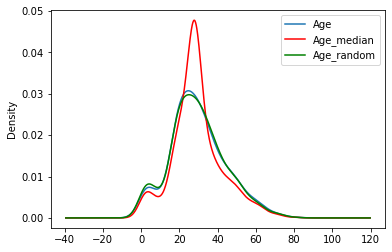

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#### Advantages and Disadvantages :

__Advantages of Mean/ Median/ Mode Replacement__

- Easy to Implement.
- Faster way to obtain complete dataset.

__Disadvantages of Mean/ Median/ Mode Replacement__

- Changes the Distortion or variance.
- Changes the correlation.


__Advantages of Random Sample Imputation__:

- Very less change in distortion or variance.
- Easy to implement. 

__Disadvantages of Random Sample Imputation__: 

- Won't work with every situation.


## Capturing NaN values with a new feature: 

This method works when the data is __not missing completely at random (MCAR)__

Here we replace the nan values with 1 and the rest as 0 in a new feature.

In [30]:
data = pd.read_csv('train.csv', usecols = ['PassengerId', 'Survived', 'Age','Fare'] )

In [31]:
data.head(10)

,PassengerId,Survived,Age,Fare
0,1,0,22.0,7.2500
1,2,1,38.0,71.2833
2,3,1,26.0,7.9250
3,4,1,35.0,53.1000
4,5,0,35.0,8.0500
5,6,0,NaN,8.4583
6,7,0,54.0,51.8625
7,8,0,2.0,21.0750
8,9,1,27.0,11.1333
9,10,1,14.0,30.0708


In [32]:
data['Age_Nan'] = np.where(data['Age'].isnull(),1,0)

In [33]:
data.head(10)

,PassengerId,Survived,Age,Fare,Age_Nan
0,1,0,22.0,7.2500,0
1,2,1,38.0,71.2833,0
2,3,1,26.0,7.9250,0
3,4,1,35.0,53.1000,0
4,5,0,35.0,8.0500,0
5,6,0,NaN,8.4583,1
6,7,0,54.0,51.8625,0
7,8,0,2.0,21.0750,0
8,9,1,27.0,11.1333,0
9,10,1,14.0,30.0708,0


This method shows the significance of missing values in the dataset.

In [34]:
median = df['Age'].median()

In [35]:
data['Age'].fillna(median, inplace=True)

In [36]:
data.head(10)

,PassengerId,Survived,Age,Fare,Age_Nan
0,1,0,22.0,7.2500,0
1,2,1,38.0,71.2833,0
2,3,1,26.0,7.9250,0
3,4,1,35.0,53.1000,0
4,5,0,35.0,8.0500,0
5,6,0,28.0,8.4583,1
6,7,0,54.0,51.8625,0
7,8,0,2.0,21.0750,0
8,9,1,27.0,11.1333,0
9,10,1,14.0,30.0708,0


### Advantages :

- Easy to implement
- Captures the importance of missing value

### Disadvantage: 

- Additional features are created which will lead to __Curse of Dimensionality__

## End of Distribution Imputation

Here we impute the right value towards the end of the distribution i.e after 3*standard deviation

In [37]:
data = pd.read_csv('train.csv', usecols = ['PassengerId', 'Survived', 'Age','Fare'] )

In [38]:
data.head()

,PassengerId,Survived,Age,Fare
0,1,0,22.0,7.2500
1,2,1,38.0,71.2833
2,3,1,26.0,7.9250
3,4,1,35.0,53.1000
4,5,0,35.0,8.0500


<AxesSubplot:>

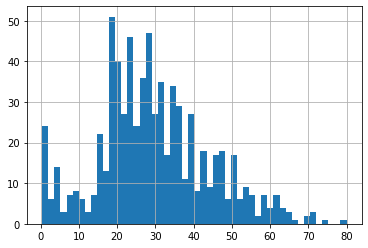

In [39]:
data['Age'].hist(bins = 50)

In [40]:
extreme = data.Age.mean()+3*data.Age.std()
print(extreme)

73.27860964406095


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

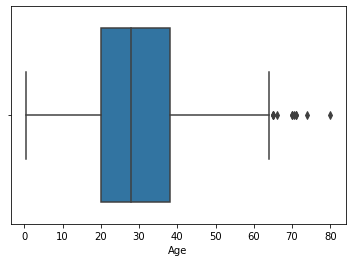

In [41]:
import seaborn as sns
sns.boxplot('Age', data = data)

In [42]:
def impute_na(data, variable, median, extreme):
    data[variable+"_end_distribution"] = df[variable].fillna(extreme)
    data[variable].fillna(median, inplace = True)

In [43]:
impute_na(data,'Age', data.Age.median(), extreme)

In [44]:
data.head(10)

,PassengerId,Survived,Age,Fare,Age_end_distribution
0,1,0,22.0,7.2500,NaN
1,2,1,38.0,71.2833,22.00000
2,3,1,26.0,7.9250,38.00000
3,4,1,35.0,53.1000,26.00000
4,5,0,35.0,8.0500,35.00000
5,6,0,28.0,8.4583,35.00000
6,7,0,54.0,51.8625,73.27861
7,8,0,2.0,21.0750,54.00000
8,9,1,27.0,11.1333,2.00000
9,10,1,14.0,30.0708,27.00000


<AxesSubplot:>

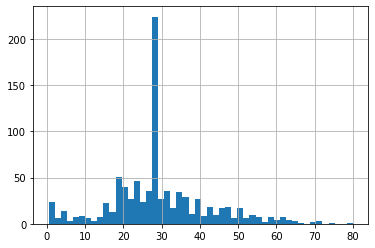

In [45]:
data['Age'].hist(bins = 50)

<AxesSubplot:>

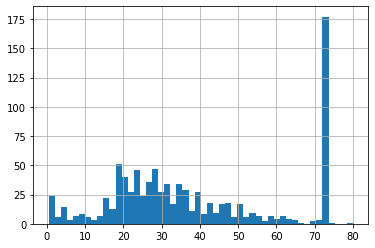

In [46]:
data['Age_end_distribution'].hist(bins = 50)

As you can notice the data points are moved towards the extremes

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

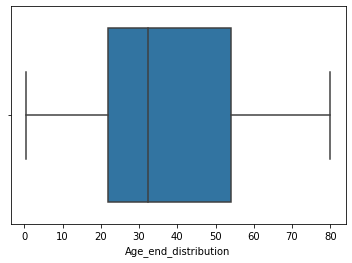

In [47]:
sns.boxplot('Age_end_distribution', data = data)

Now, here we see that there are no outliers in this scenario.

### Advantages: 
- Easy to implement
- Captures the importance of missingness

### Disadvantage: 

- Distorts the original variance of the variable
- If missingness is not important, it may mask the predictive power of the original variable by distorting the distribution
- If the number of NA is big, it will mask the true outliers
- If the number of NA is small, it may be considered as an outlier and preprocessed in a subsequent feature engineering 

So till now we have dealt with how to handle missing values when the data is numerical. Now we will go on handling missing data when the data is categorical.

## Frequent Categories Imputation

In [48]:
os.chdir(r'C:\Users\Gourav Nandy\OneDrive\My career\Data Science\datasets')

In [49]:
df = pd.read_csv('house_price_prediction.csv', usecols = ['BsmtQual','FireplaceQu','GarageType'])
df.head()

,BsmtQual,FireplaceQu,GarageType
0,Gd,NaN,Attchd
1,Gd,TA,Attchd
2,Gd,TA,Attchd
3,TA,Gd,Detchd
4,Gd,TA,Attchd


In [50]:
df.isnull().mean()*100

BsmtQual        2.534247
FireplaceQu    47.260274
GarageType      5.547945
dtype: float64

<AxesSubplot:>

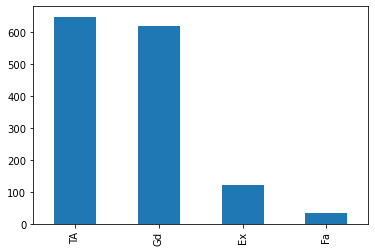

In [51]:
df['BsmtQual'].value_counts().plot.bar()

<AxesSubplot:>

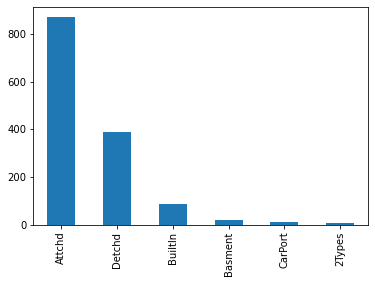

In [52]:
df['GarageType'].value_counts().plot.bar()

In [53]:
df['GarageType'].mode()[0]

'Attchd'

In [54]:
def impute_nan_cat(df,variable):
    mode = df[variable].mode()[0]
    df[variable].fillna(mode, inplace = True)

In [55]:
for i in ['BsmtQual','GarageType']:
    impute_nan_cat(df,i)

In [56]:
df.isnull().mean()*100

BsmtQual        0.000000
FireplaceQu    47.260274
GarageType      0.000000
dtype: float64

### Advantages : 

- It is easy to implement
- It is fast 

### Disadvantages:

- Cannot be used in data where a lot of number is missing as the mode value will be more represented. 
- Distorts the relation of most frequent labels


## Adding Feature for NaN values in categorical variable

In [57]:
df = pd.read_csv('house_price_prediction.csv', usecols = ['BsmtQual','FireplaceQu','GarageType'])
df.head()

,BsmtQual,FireplaceQu,GarageType
0,Gd,NaN,Attchd
1,Gd,TA,Attchd
2,Gd,TA,Attchd
3,TA,Gd,Detchd
4,Gd,TA,Attchd


In [58]:
df.isnull().mean() *100

BsmtQual        2.534247
FireplaceQu    47.260274
GarageType      5.547945
dtype: float64

In [59]:
df['BsmtQual_na'] = np.where(df['BsmtQual'].isnull(),1,0)

In [60]:
df['BsmtQual'].fillna(df['BsmtQual'].mode()[0], inplace = True)

In [61]:
df.head(20)

,BsmtQual,FireplaceQu,GarageType,BsmtQual_na
0,Gd,NaN,Attchd,0
1,Gd,TA,Attchd,0
2,Gd,TA,Attchd,0
3,TA,Gd,Detchd,0
4,Gd,TA,Attchd,0
5,Gd,NaN,Attchd,0
6,Ex,Gd,Attchd,0
7,Gd,TA,Attchd,0
8,TA,TA,Detchd,0
9,TA,TA,Attchd,0


### Advatages : 

- Shows the relevance of missing values in the data set
- Easy to implement

### Disadvantages: 

- Too many features causing Curse to dimensionality.

## Treating Missing values as a new category: 

Suppose we have multiple categorical variable of missing values. We can assume the missing values to be a new type of category.

In [62]:
df = pd.read_csv('house_price_prediction.csv', usecols = ['BsmtQual','FireplaceQu','GarageType'])
df.head()

,BsmtQual,FireplaceQu,GarageType
0,Gd,NaN,Attchd
1,Gd,TA,Attchd
2,Gd,TA,Attchd
3,TA,Gd,Detchd
4,Gd,TA,Attchd


In [63]:
df.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
dtype: float64

In [64]:
for i in ['BsmtQual','FireplaceQu','GarageType']: 
    df[i+"_newvar"] = np.where(df[i].isnull(),"Missing",df[i])

In [65]:
df.head()

,BsmtQual,FireplaceQu,GarageType,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,Gd,NaN,Attchd,Gd,Missing,Attchd
1,Gd,TA,Attchd,Gd,TA,Attchd
2,Gd,TA,Attchd,Gd,TA,Attchd
3,TA,Gd,Detchd,TA,Gd,Detchd
4,Gd,TA,Attchd,Gd,TA,Attchd


Replacing the __NaN__ values with a new category in new variables we can drop the original feature.

In [66]:
df = df.drop(['BsmtQual','FireplaceQu','GarageType'], axis = 1)

In [67]:
df.head()

,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,Gd,Missing,Attchd
1,Gd,TA,Attchd
2,Gd,TA,Attchd
3,TA,Gd,Detchd
4,Gd,TA,Attchd


These are the various ways in which we can handle the missing values

## KNN Imputation: 

In Knn imputation, we use the method of euclidean and nan euclidean distance to find out the missing values. Here the neighbours play an important role. This is used for Multivariate Missing values

Refer https://www.youtube.com/watch?v=-fK-xEev2I8 to understand the concept

### Advantage : 

- Very accurate

### Disadvantage : 

- Lots of calculations so the implementation is slow
- On production the whole training data is required for calculating. Hence usage of lots of memory

## MICE ( Missing Imputation using Chained Equation)

It works best way in MAR columns

https://www.youtube.com/watch?v=a38ehxv3kyk refer for the whole tutorial.

https://github.com/campusx-official/100-days-of-machine-learning/blob/main/day40-iterative-imputer/step-by-step.ipynb for the code